In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline


In [0]:
def get_subsample(start, stop, step, sub_sample_size):
    idlists = list()
    for i in range(start, stop, step):
        ilist = random.sample(list(range(i, step + i)), sub_sample_size)
        ilist.sort()
        idlists.extend(ilist)
    return idlists

In [0]:
def get_unisample(start, stop, sample_size):
  idlist =  random.sample(list(range(start, stop)),sample_size)
  idlist.sort()
  return idlist

In [10]:
columns = ["aid", "ifexist", "videos", "tname",
               "pubdate", "view", "danmaku", "reply",
               "favorite", "coin", "share", "now_rank",
               "his_rank", "like", "dislike", "duration"]

data = pd.read_csv('FinalResult.csv', sep=",", encoding='utf-8-sig', header=None,  names=columns)
"""data.fillna(value=0)"""
data.head()

,aid,ifexist,videos,tname,pubdate,view,danmaku,reply,favorite,coin,share,now_rank,his_rank,like,dislike,duration
0,231,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,396,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,513,1,1,短片·手书·配音,1.253148e+09,2518.0,18.0,60.0,53.0,3.0,4.0,0.0,0.0,3.0,0.0,20.0
3,659,1,1,单机联机,1.255681e+09,1343.0,9.0,28.0,13.0,5.0,4.0,0.0,0.0,0.0,0.0,257.0
4,702,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
def get_mean(start=0, stop=323000, step=3230,sub_sample_size=969, times=60):
    mean_list = list()
    view_mean_list = list()
    danmaku_mean_list = list()
    reply_mean_list = list()
    favorite_mean_list = list()
    coin_mean_list = list()
    share_mean_list = list()
    like_mean_list = list()
    dislike_mean_list = list()
    for i in range(times):
        random.seed(i)
        idlists = get_subsample(start=start, stop=stop, step=step, sub_sample_size=sub_sample_size)
        mean_list.append(data['ifexist'][idlists].mean())
        view_mean_list.append(data['view'][idlists].sum()/data['ifexist'][idlists].sum())
        danmaku_mean_list.append(data['danmaku'][idlists].sum()/data['ifexist'][idlists].sum())
        reply_mean_list.append(data['reply'][idlists].sum()/data['ifexist'][idlists].sum())
        favorite_mean_list.append(data['favorite'][idlists].sum()/data['ifexist'][idlists].sum())
        coin_mean_list.append(data['coin'][idlists].sum()/data['ifexist'][idlists].sum())
        share_mean_list.append(data['share'][idlists].sum()/data['ifexist'][idlists].sum())
        like_mean_list.append(data['like'][idlists].sum()/data['ifexist'][idlists].sum())
        dislike_mean_list.append(data['dislike'][idlists].sum()/data['ifexist'][idlists].sum())
    print("Stratified Sampling Rate: %f, Sampling Times: %d, Sample Mean: %f, Sample Std: %f" %(sub_sample_size/step, times, np.mean(mean_list), np.std(mean_list)))
    print("View Mean:",np.mean(view_mean_list))
    print("danmaku Mean:",np.mean(danmaku_mean_list))
    print("reply Mean:",np.mean(reply_mean_list))
    print("favorite Mean:",np.mean(favorite_mean_list))
    print("coin Mean:",np.mean(coin_mean_list))
    print("share Mean:",np.mean(share_mean_list))
    print("like Mean:",np.mean(like_mean_list))
    print("dislike Mean:",np.mean(dislike_mean_list))
    return np.array(mean_list)

In [0]:
def get_unimean(start=0, stop=323000, sample_size=3230, times=60):
  mean_list = list()
  view_mean_list = list()
  danmaku_mean_list = list()
  for i in range(times):
    random.seed(i)
    idlist = get_unisample(start=start, stop=stop, sample_size = sample_size)
    mean_list.append(data['ifexist'][idlist].mean())
  print("Simple Sampling Weight: %f, Sampling Times: %d, Sample Mean: %f, Sample Std: %f" %(sample_size/(stop - start), times, np.mean(mean_list), np.std(mean_list)))
  return np.array(mean_list)

In [13]:
mean_list_1 = get_mean(sub_sample_size=162, times = 100)

Stratified Sampling Rate: 0.050155, Sampling Times: 100, Sample Mean: 0.680928, Sample Std: 0.003399
View Mean: 7419.384879863622
danmaku Mean: 129.63251501321122
reply Mean: 31.02188968766297
favorite Mean: 126.53212338907004
coin Mean: 55.69351204138069
share Mean: 23.93804217291316
like Mean: 33.52708591616399
dislike Mean: 0.6834908810806313


In [14]:
mean_list_2 = get_mean(sub_sample_size=323, times = 100)

Stratified Sampling Rate: 0.100000, Sampling Times: 100, Sample Mean: 0.680842, Sample Std: 0.002336
View Mean: 7336.1227442824165
danmaku Mean: 129.03155544584763
reply Mean: 30.87243072684244
favorite Mean: 126.13333482268426
coin Mean: 54.86503012698179
share Mean: 23.687708183539826
like Mean: 33.98455733329207
dislike Mean: 0.67017141745571


In [15]:
mean_list_3 = get_mean(sub_sample_size=485, times = 100)

Stratified Sampling Rate: 0.150155, Sampling Times: 100, Sample Mean: 0.681128, Sample Std: 0.001859
View Mean: 7427.585354450089
danmaku Mean: 130.39315262421206
reply Mean: 31.186929914892765
favorite Mean: 127.59035414599516
coin Mean: 55.970082507561926
share Mean: 23.802373434163034
like Mean: 34.002303720378514
dislike Mean: 0.6761764642522408


In [16]:
mean_list_4 = get_mean(sub_sample_size=646, times = 100)

Stratified Sampling Rate: 0.200000, Sampling Times: 100, Sample Mean: 0.681251, Sample Std: 0.001631
View Mean: 7407.342261172248
danmaku Mean: 133.03143939837682
reply Mean: 31.16220933887158
favorite Mean: 127.11245859709969
coin Mean: 55.70842038149921
share Mean: 23.51260695568197
like Mean: 33.6970424728187
dislike Mean: 0.6840522057013244


In [17]:
mean_list_5 = get_mean(sub_sample_size=808, times = 100)

Stratified Sampling Rate: 0.250155, Sampling Times: 100, Sample Mean: 0.681435, Sample Std: 0.001443
View Mean: 7410.2416186595665
danmaku Mean: 131.7189778463196
reply Mean: 31.285814802273794
favorite Mean: 127.79725369701342
coin Mean: 55.47537051004996
share Mean: 23.639663430576743
like Mean: 33.77146733935307
dislike Mean: 0.6804301369411874


In [18]:
mean_list_6 = get_mean(sub_sample_size=969, times = 100)

Stratified Sampling Rate: 0.300000, Sampling Times: 100, Sample Mean: 0.681485, Sample Std: 0.001242
View Mean: 7400.965205188225
danmaku Mean: 131.64922094409036
reply Mean: 31.250967281581588
favorite Mean: 127.12865242441389
coin Mean: 56.27743278422132
share Mean: 23.651088231482873
like Mean: 33.96443357567574
dislike Mean: 0.6789559949463261


In [19]:
print("Ground Truth: %f" % data['ifexist'].mean())
print(data['view'].sum()/data['ifexist'].sum())
print(data['danmaku'].sum()/data['ifexist'].sum())
print(data['reply'].sum()/data['ifexist'].sum())
print(data['favorite'].sum()/data['ifexist'].sum())
print(data['coin'].sum()/data['ifexist'].sum())
print(data['share'].sum()/data['ifexist'].sum())
print(data['like'].sum()/data['ifexist'].sum())
print(data['dislike'].sum()/data['ifexist'].sum())

Ground Truth: 0.681316
7412.76675527685
131.35308658805354
31.19910026583055
127.2606457183105
55.93155658555427
23.64973076136596
33.94770181537273
0.6811214868334355


In [0]:
gmean = data['ifexist'].mean()

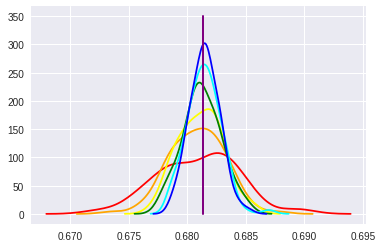

In [21]:
p1 = sns.kdeplot(mean_list_1, color = 'red')
p1 = sns.kdeplot(mean_list_2, color = 'orange')
p1 = sns.kdeplot(mean_list_3, color = 'yellow')
p1 = sns.kdeplot(mean_list_4, color = 'green')
p1 = sns.kdeplot(mean_list_5, color = 'cyan')
p1 = sns.kdeplot(mean_list_6, color = 'blue')
plt.plot([gmean, gmean], [0, 350],lw=2, color = 'purple')

In [22]:
print("Ground Truth: %f" % (data['ifexist'].mean()*32300000))
print("Ground Truth: %f" % (data['videos'].mean()*32300000))
print("Ground Truth: %f" % (data['duration'].mean()))

Ground Truth: 22006500.000000
Ground Truth: 35101900.000000
Ground Truth: 1307.036407


In [23]:
sim_mean_list_1 = get_unimean(sample_size=16150, times = 100)

Simple Sampling Weight: 0.050000, Sampling Times: 100, Sample Mean: 0.681020, Sample Std: 0.003934


In [24]:
sim_mean_list_2 = get_unimean(sample_size=32300, times = 100)

Simple Sampling Weight: 0.100000, Sampling Times: 100, Sample Mean: 0.681373, Sample Std: 0.002388


In [25]:
sim_mean_list_3 = get_unimean(sample_size=48450, times = 100)

Simple Sampling Weight: 0.150000, Sampling Times: 100, Sample Mean: 0.681287, Sample Std: 0.001746


In [26]:
sim_mean_list_4 = get_unimean(sample_size=64600, times = 100)

Simple Sampling Weight: 0.200000, Sampling Times: 100, Sample Mean: 0.681352, Sample Std: 0.001627


In [27]:
sim_mean_list_5 = get_unimean(sample_size=80750, times = 100)

Simple Sampling Weight: 0.250000, Sampling Times: 100, Sample Mean: 0.681309, Sample Std: 0.001406


In [28]:
sim_mean_list_6 = get_unimean(sample_size=96900, times = 100)

Simple Sampling Weight: 0.300000, Sampling Times: 100, Sample Mean: 0.681225, Sample Std: 0.001202


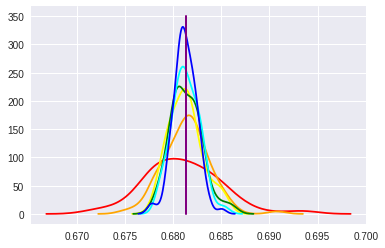

In [29]:
p2 = sns.kdeplot(sim_mean_list_1, color = 'red')
p2 = sns.kdeplot(sim_mean_list_2, color = 'orange')
p2 = sns.kdeplot(sim_mean_list_3, color = 'yellow')
p2 = sns.kdeplot(sim_mean_list_4, color = 'green')
p2 = sns.kdeplot(sim_mean_list_5, color = 'cyan')
p2 = sns.kdeplot(sim_mean_list_6, color = 'blue')
p2.plot([gmean, gmean], [0, 350],lw=2, color = 'purple')

In [0]:
total_mean = (np.mean(mean_list_1)+np.mean(mean_list_2)+np.mean(mean_list_3)+np.mean(mean_list_4)+np.mean(mean_list_5)+np.mean(mean_list_6))/6

In [0]:
total_sim_mean = (np.mean(sim_mean_list_1)+np.mean(sim_mean_list_2)+np.mean(sim_mean_list_3)+np.mean(sim_mean_list_4)+np.mean(sim_mean_list_5)+np.mean(sim_mean_list_6))/6


In [32]:
total_sim_mean

0.6812609821121431

In [33]:
total_mean

0.6811781589944736

In [34]:
columns = ["aid", "ifexist", "videos", "tname",
               "pubdate", "view", "danmaku", "reply",
               "favorite", "coin", "share", "now_rank",
               "his_rank", "like", "dislike", "duration"]

data1 = pd.read_csv('FinalResult.csv', sep=",", encoding='utf-8-sig', header=None,  names=columns)
data1.head()

,aid,ifexist,videos,tname,pubdate,view,danmaku,reply,favorite,coin,share,now_rank,his_rank,like,dislike,duration
0,231,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,396,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,513,1,1,短片·手书·配音,1.253148e+09,2518.0,18.0,60.0,53.0,3.0,4.0,0.0,0.0,3.0,0.0,20.0
3,659,1,1,单机联机,1.255681e+09,1343.0,9.0,28.0,13.0,5.0,4.0,0.0,0.0,0.0,0.0,257.0
4,702,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
import datetime

In [0]:
data1['pubdate'] = data1['pubdate'].replace(data1['pubdate'][0],0)
data1['pubdate'] = data1['pubdate'].astype(int)
#data1['pubdate'] = data1['pubdate'].replace(0,'NaN')

In [0]:
data1['pubdate']=pd.to_datetime(data1['pubdate'], unit='s')
def f(x):
  return x.strftime('%Y-%m')
data1['pubdate'] = data1['pubdate'].apply(f)

In [38]:
data1.head()

,aid,ifexist,videos,tname,pubdate,view,danmaku,reply,favorite,coin,share,now_rank,his_rank,like,dislike,duration
0,231,0,0,NaN,1970-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,396,0,0,NaN,1970-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,513,1,1,短片·手书·配音,2009-09,2518.0,18.0,60.0,53.0,3.0,4.0,0.0,0.0,3.0,0.0,20.0
3,659,1,1,单机联机,2009-10,1343.0,9.0,28.0,13.0,5.0,4.0,0.0,0.0,0.0,0.0,257.0
4,702,0,0,NaN,1970-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
timedata = data1.groupby('pubdate').count()['aid'][1:]
viewdata = data1.groupby('pubdate').sum()['view'][1:]

NameError: ignored

In [34]:
timedata.head()

pubdate
2009-09     1
2009-10     1
2009-11     1
2010-01     1
2010-02    14
Name: aid, dtype: int64

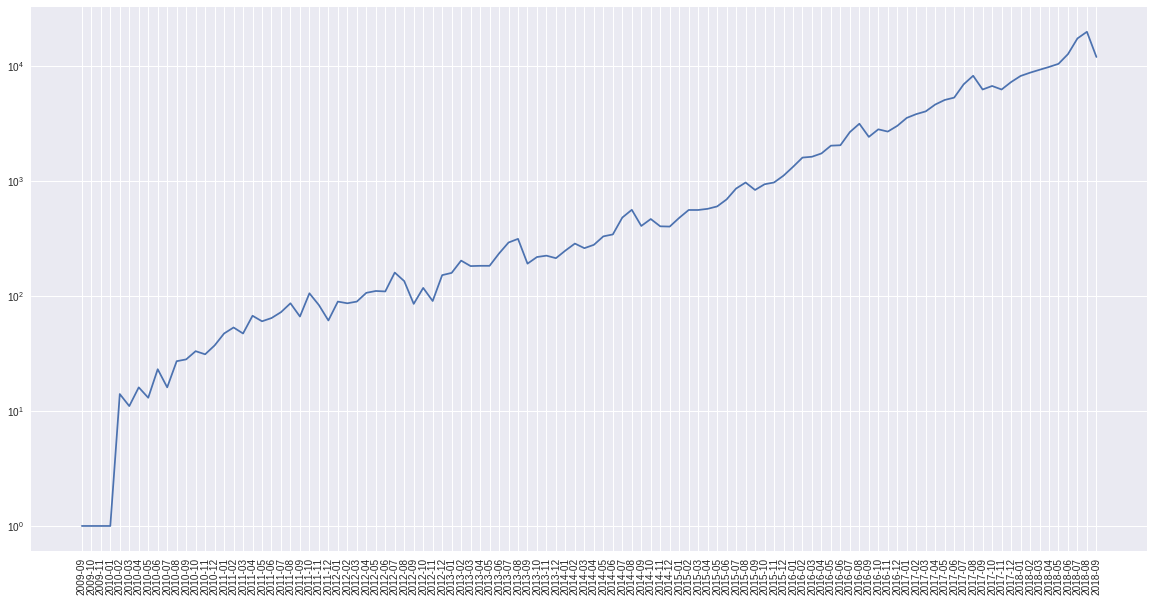

In [44]:
t1 = plt.figure(figsize=(20,10))
t1 = plt.plot(timedata)
t1 = plt.yscale('log',basey=10)
t1 = plt.xticks(rotation='vertical')

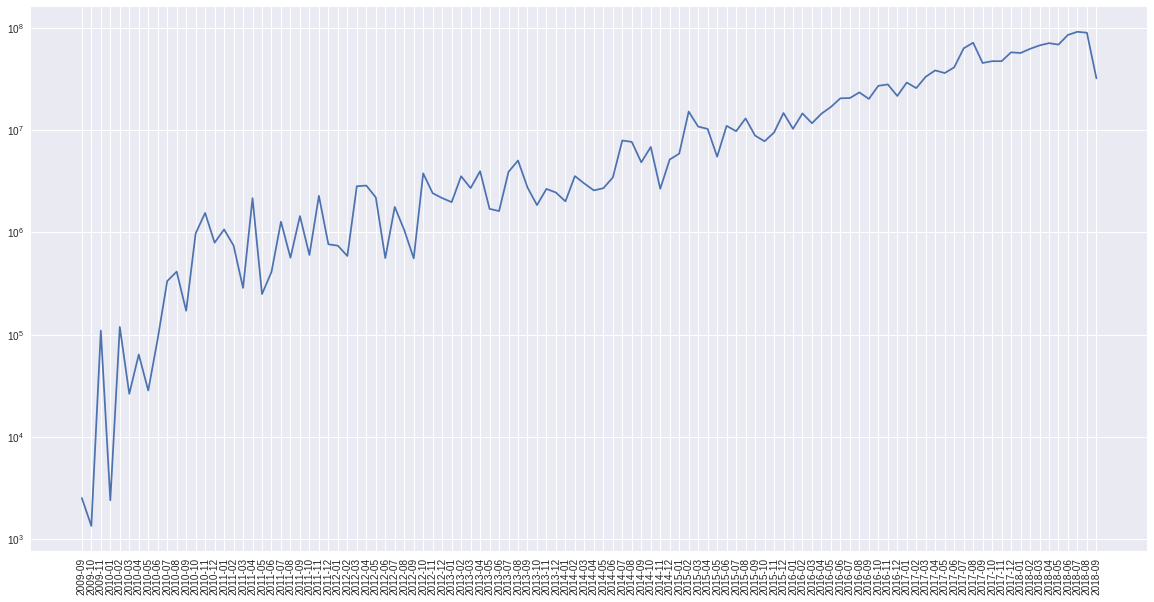

In [35]:
v1 = plt.figure(figsize=(20,10))
v1 = plt.plot(viewdata)
t1 = plt.yscale('log',basey=10)
v1 = plt.xticks(rotation='vertical')

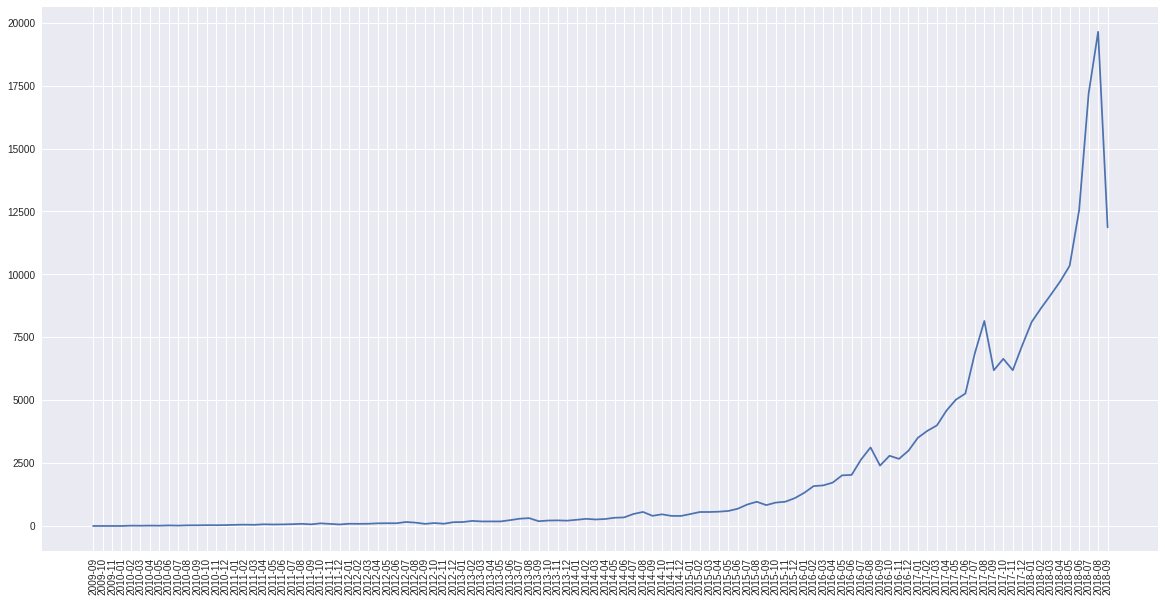

In [28]:
t0 = plt.figure(figsize=(20,10))
t0 = plt.plot(timedata)
t0 = plt.xticks(rotation='vertical')

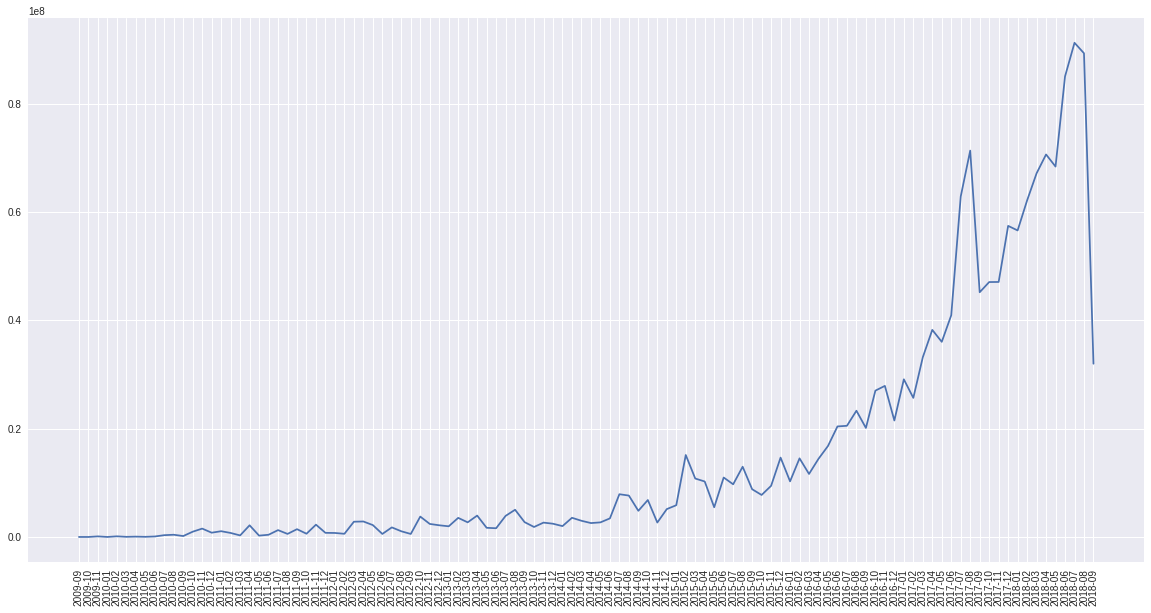

In [29]:
v1 = plt.figure(figsize=(20,10))
v2 = plt.plot(viewdata)
v3 = plt.xticks(rotation='vertical')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose